In [1]:
import os
import socket
import subprocess
import pandas as pd
import io
from contextlib import redirect_stdout
import itertools
import warnings
from datetime import datetime
import time
import timeout_decorator
import numpy as np
import matplotlib.pyplot as plt
import math
import sys


In [2]:
def islocal(): return socket.gethostname()=="rc-idsia-macBook.local"
def isserver(): return socket.gethostname()=="ec6120930b2d"
def strdate(): return datetime.today().strftime('%Y-%m-%d-%H-%M-%S')


if islocal():
    prj_path = "/Users/rcabanas/GoogleDrive/IDSIA/causality/dev/crema/CreMA"
    os.environ['JAVA_HOME'] = "/Library/Java/JavaVirtualMachines/openjdk-12.0.1.jdk/Contents/Home"
elif isserver():
    prj_path="/home/rcabanas/work_java_crema/crema/CreMA"
else:
    warnings.warn("Unknown server, set prj_path variable manually.")
os.chdir(prj_path)
!pwd

/home/rcabanas/work_java_crema/crema/CreMA


In [3]:
exp_folder = f"{prj_path}/papers/pgm20/experiments/"
log_folder = f"{exp_folder}/logs/"
res_folder = f"{exp_folder}/results/"

In [4]:
sys.path.append(exp_folder)
from utilplots import *

In [5]:
preliminaryBinary = {
    "markovian_ev" : f"{res_folder}/2020-04-23-08-24-04_chain_markovian_ev.csv",
    "markovian_nonev" : f"{res_folder}/2020-04-23-12-56-12_chain_markovian_nonev.csv",
    "nonmarkovian_ev" :f"{res_folder}/2020-04-23-11-06-42_chain_nonmarkovian_ev.csv",
    "nonmarkovian_nonev" :f"{res_folder}/2020-04-23-15-37-22_chain_nonmarkovian_nonev.csv"
}

## binary results with 5 seeds
binRes = {
    "markovian_ev" : f"{res_folder}/2020-04-26-16-37-58_chain_markovian_ev.csv",
    "nonmarkovian_ev" :f"{res_folder}/2020-04-27-22-28-04_chain_nonmarkovian_ev.csv"
}

terRes = {
    "markovian_ev" : f"{res_folder}/2020-04-27-07-17-45_chain_markovian_ev.csv",
    "nonmarkovian_ev":f"{res_folder}/2020-05-04-00-23-39_chain_nonmarkovian_ev.csv",
}

terbinRes = {
    "markovian_ev": f"{res_folder}/2020-05-04-16-23-18_chain_terbin_markovian_ev.csv",
    "nonmarkovian_ev" : f"{res_folder}/2020-05-05-17-23-26_chain_terbin_nonmarkovian_ev.csv",
}


######
paths = terbinRes

## Chain markovian case

query: $P(X_{N//2} | X_{N-1}, do(X_0))$

/home/rcabanas/work_java_crema/crema/CreMA/papers/pgm20/experiments/utilplots.py:35: RuntimeWarning: Mean of empty slice
  for k in t.to_dict().keys() if "lowerbound" in k]), axis=1)


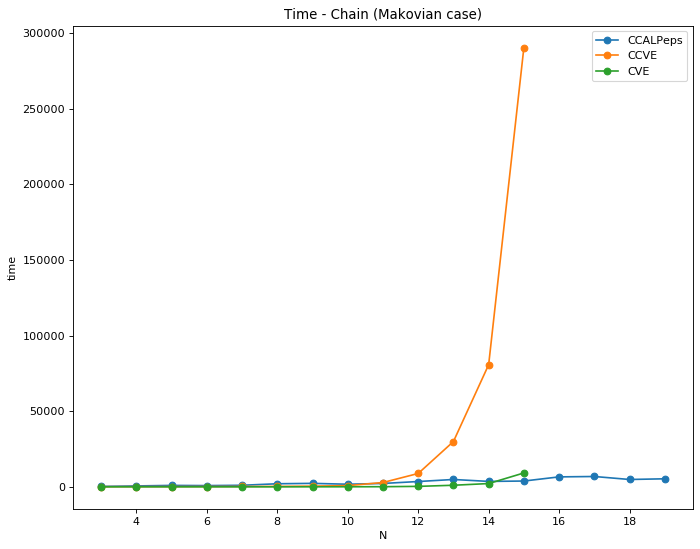

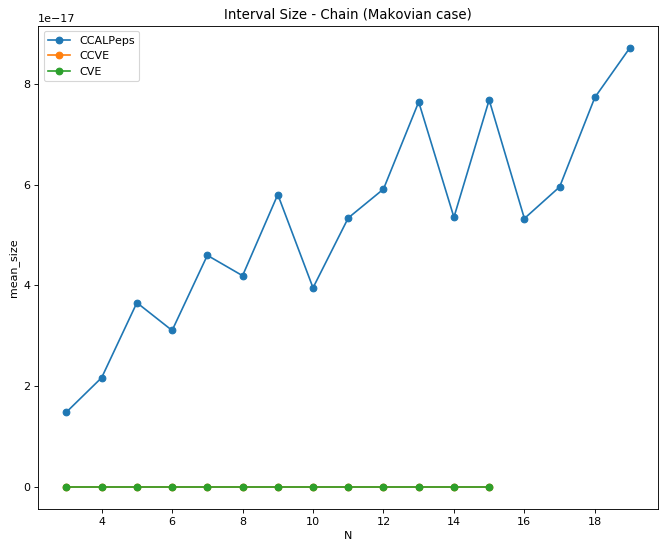

In [6]:
datafile = paths["markovian_ev"]
if datafile != None:
    results = pd.read_csv(datafile)
    plot_time(results, title="Time - Chain (Makovian case)")
    plot_size(results, title = "Interval Size - Chain (Makovian case)")

## Chain non-markovian case

query: $P(X_{N//2} | X_{N-1}, do(X_0))$

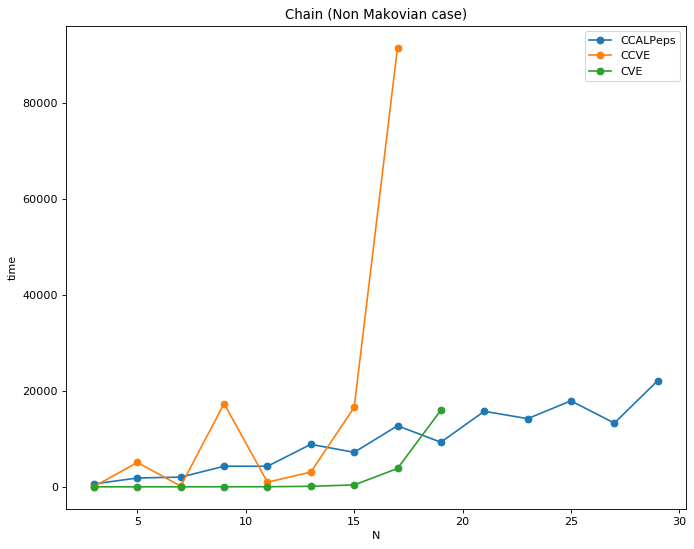

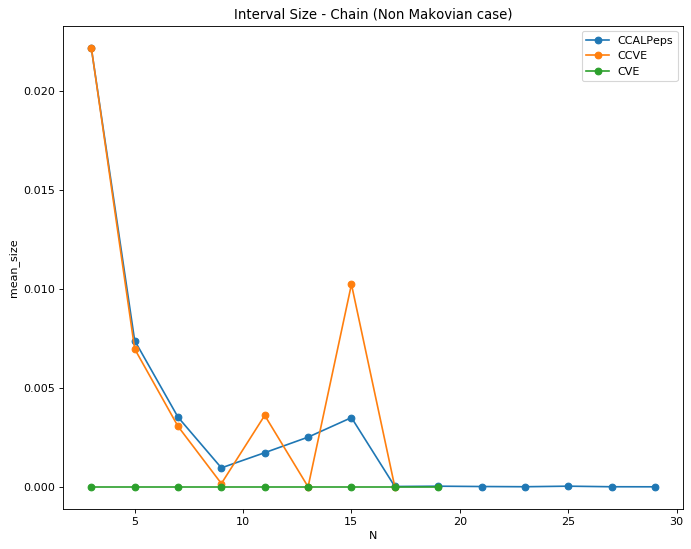

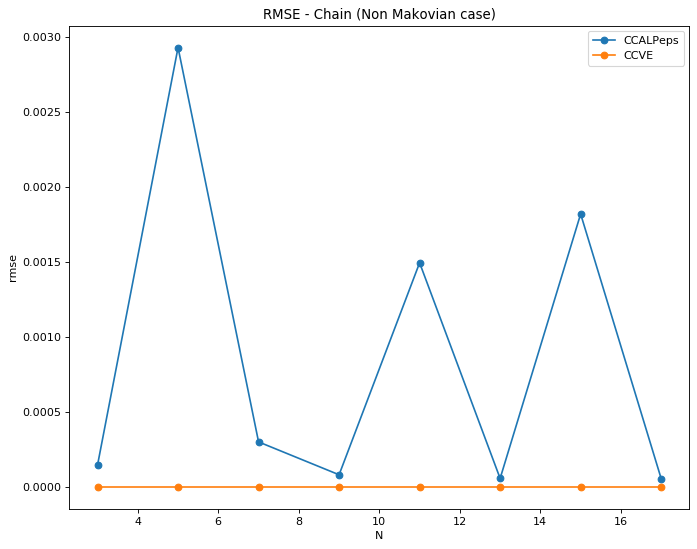

In [7]:
datafile = paths["nonmarkovian_ev"]
results = pd.read_csv(datafile)
plot_time(results, title = "Chain (Non Makovian case)")
plot_size(results, title = "Interval Size - Chain (Non Makovian case)")
plot_rmse(results, title = "RMSE - Chain (Non Makovian case)")


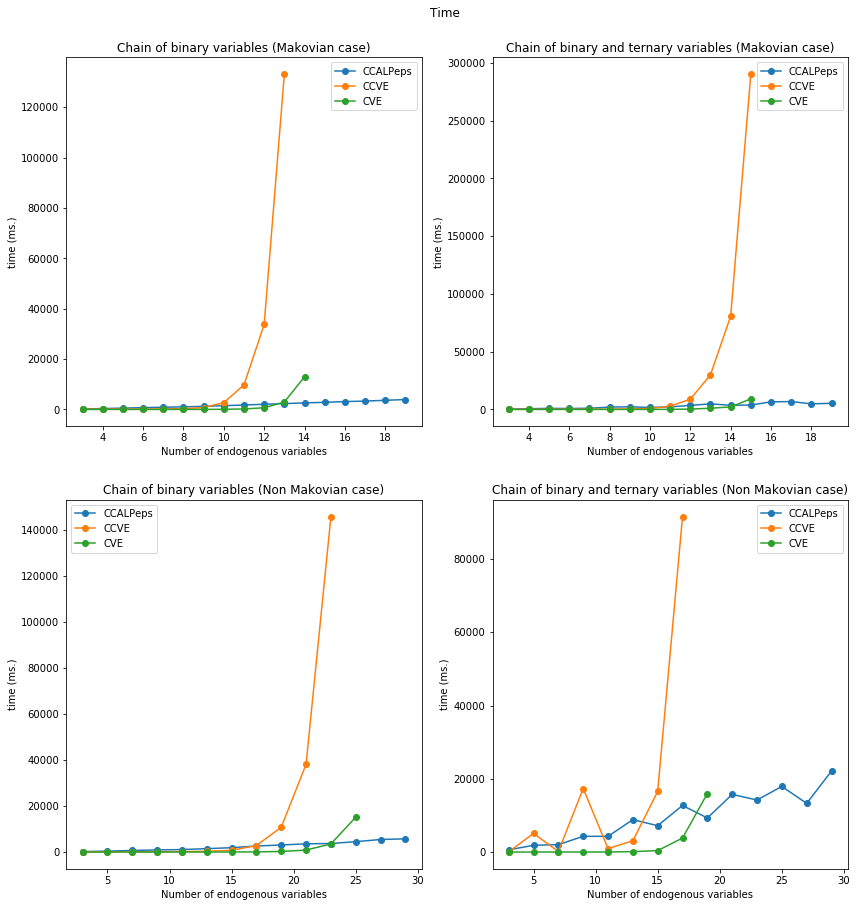

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(14,14))

plot_func = plot_time
ylabel = "time (ms.)"
fig.suptitle("Time")
fig.subplots_adjust(top=0.93)

plot_func(pd.read_csv(binRes["markovian_ev"]), ax=axs[0,0],
          title="Chain of binary variables (Makovian case)",
          xlabel="Number of endogenous variables", ylabel=ylabel)

plot_func(pd.read_csv(binRes["nonmarkovian_ev"]), ax=axs[1,0],
          title="Chain of binary variables (Non Makovian case)",
          xlabel="Number of endogenous variables", ylabel=ylabel)

plot_func(pd.read_csv(terbinRes["markovian_ev"]), ax=axs[0,1],
          title="Chain of binary and ternary variables (Makovian case)",
          xlabel="Number of endogenous variables", ylabel=ylabel)

plot_func(pd.read_csv(terbinRes["nonmarkovian_ev"]), ax=axs[1,1],
          title="Chain of binary and ternary variables (Non Makovian case)",
          xlabel="Number of endogenous variables", ylabel=ylabel)




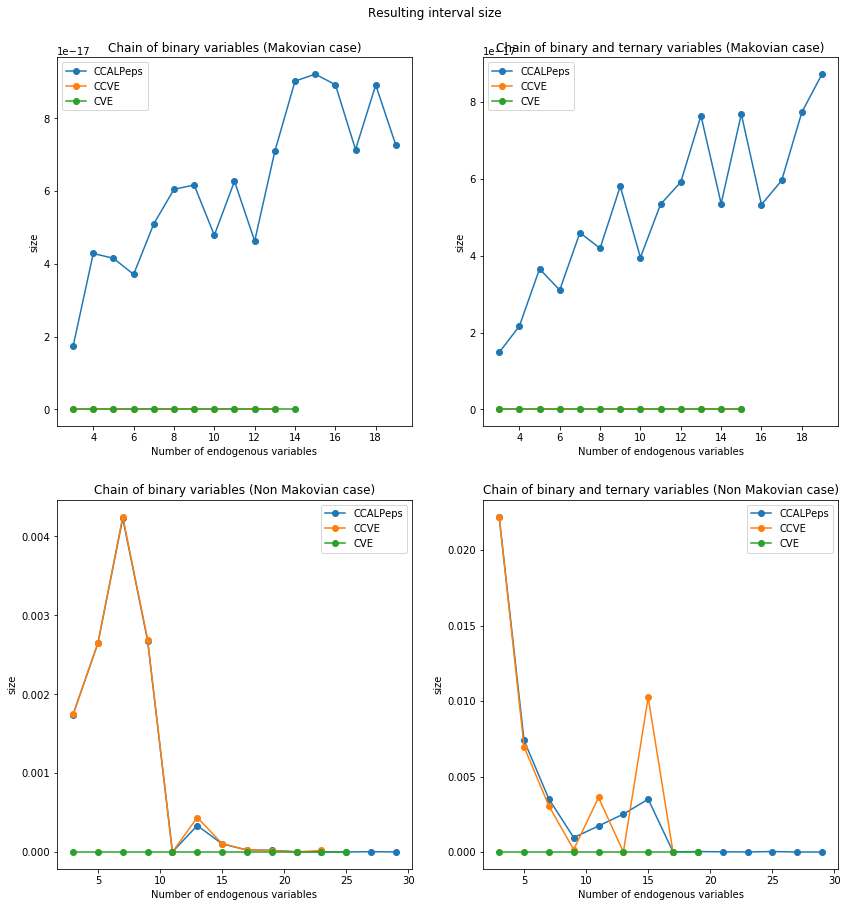

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(14,14))

plot_func = plot_size
ylabel = "size"
fig.suptitle("Resulting interval size")
fig.subplots_adjust(top=0.93)


plot_func(pd.read_csv(binRes["markovian_ev"]), ax=axs[0,0],
          title="Chain of binary variables (Makovian case)",
          xlabel="Number of endogenous variables", ylabel=ylabel)

plot_func(pd.read_csv(binRes["nonmarkovian_ev"]), ax=axs[1,0],
          title="Chain of binary variables (Non Makovian case)",
          xlabel="Number of endogenous variables", ylabel=ylabel)

plot_func(pd.read_csv(terbinRes["markovian_ev"]), ax=axs[0,1],
          title="Chain of binary and ternary variables (Makovian case)",
          xlabel="Number of endogenous variables", ylabel=ylabel)

plot_func(pd.read_csv(terbinRes["nonmarkovian_ev"]), ax=axs[1,1],
          title="Chain of binary and ternary variables (Non Makovian case)",
          xlabel="Number of endogenous variables", ylabel=ylabel)


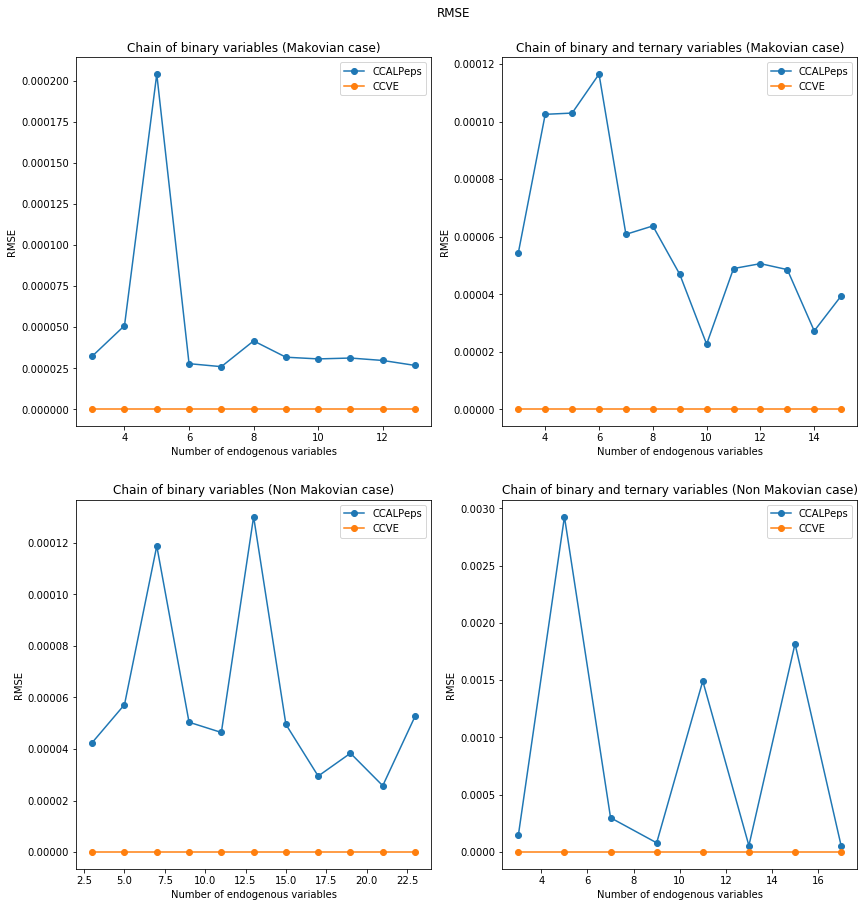

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(14,14))

plot_func = plot_rmse
ylabel = "RMSE"
fig.suptitle("RMSE")
fig.subplots_adjust(top=0.93)


plot_func(pd.read_csv(binRes["markovian_ev"]), ax=axs[0,0],
          title="Chain of binary variables (Makovian case)",
          xlabel="Number of endogenous variables", ylabel=ylabel)

plot_func(pd.read_csv(binRes["nonmarkovian_ev"]), ax=axs[1,0],
          title="Chain of binary variables (Non Makovian case)",
          xlabel="Number of endogenous variables", ylabel=ylabel)

plot_func(pd.read_csv(terbinRes["markovian_ev"]), ax=axs[0,1],
          title="Chain of binary and ternary variables (Makovian case)",
          xlabel="Number of endogenous variables", ylabel=ylabel)

plot_func(pd.read_csv(terbinRes["nonmarkovian_ev"]), ax=axs[1,1],
          title="Chain of binary and ternary variables (Non Makovian case)",
          xlabel="Number of endogenous variables", ylabel=ylabel)